In [1]:
import pandas as pd
import numpy as np


from AnalyzeSrc.HandlingMissingData import (
    MissingValueHandler,
    CategoricalMissingFeatureStrategy,
    StatisticalModelImputationStrategy,
    KNNImputationStrategy,
    FillMissingValuesStrategy,
    DropMissingValuesStrategy
)

from AnalyzeSrc.EncodingStrategies import (
    CategoricalFeatureEncoder
)

from AnalyzeSrc.MissingValueAnalysis import SimpleMissingValuesAnalysis

In [2]:
# Load the data
# Assuming you have already extracted the data into the 'Dataset/Extracted/' folder

train_data_path = '../Dataset/Extracted/train.csv'
test_data_path = '../Dataset/Extracted/test.csv'
sample_submission_path = '../Dataset/Extracted/sample_submission.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
sample_submission_df = pd.read_csv(sample_submission_path)

In [3]:
# Step 1: Handle `error_code` missing values as a feature

missing_value_handler = MissingValueHandler(CategoricalMissingFeatureStrategy(
    column_name = 'error_code',
    fill_value = 'No Error'
))

df = missing_value_handler.handle_missing_values(train_df)
df

2025-06-03 11:49:17,199 - INFO - Executing missing value handling strategy.
2025-06-03 11:49:17,200 - INFO - Handling missing values in categorical column 'error_code' as a feature
2025-06-03 11:49:17,207 - INFO - Created missing indicator feature 'error_code_is_missing'
2025-06-03 11:49:17,209 - INFO - Filled missing values in 'error_code' with 'No Error'


,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency,error_code_is_missing
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,No Error,NaN,0.562096,1
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,E00,dual-axis,0.396447,0
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814399755560454,1010.9226539809573,C3,E00,NaN,0.573776,0
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,No Error,dual-axis,0.629009,1
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,E00,fixed,0.341874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,NaN,93.53031757838667,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,12.594122273332914,1018.3744670739436,B2,E02,tracking,0.664907,0
19996,19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,0.9769909288128159,1016.081102065643,D4,E00,fixed,0.354070,0
19997,19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,4.750937249871706,1009.6844614602336,D4,No Error,tracking,0.419734,1
19998,19998,NaN,632.760700,43.01470184078199,19.063517,4.0,NaN,0.000000,1.068906,21.149351,78.123689,11.304158443374758,1006.6738746072241,A1,E00,tracking,0.661963,0


In [4]:
# Step 2: Encode the categorical features `error_code`

encoder = CategoricalFeatureEncoder(encoding_type='one_hot')
df = encoder.encode_feature(df, 'error_code')
df.drop('error_code_is_missing', axis = 1, inplace=True)
df

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,installation_type,efficiency,error_code_E00,error_code_E01,error_code_E02,error_code_No Error
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,NaN,0.562096,0.0,0.0,0.0,1.0
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,dual-axis,0.396447,1.0,0.0,0.0,0.0
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814399755560454,1010.9226539809573,C3,NaN,0.573776,1.0,0.0,0.0,0.0
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,dual-axis,0.629009,0.0,0.0,0.0,1.0
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,fixed,0.341874,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,NaN,93.53031757838667,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,12.594122273332914,1018.3744670739436,B2,tracking,0.664907,0.0,0.0,1.0,0.0
19996,19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,0.9769909288128159,1016.081102065643,D4,fixed,0.354070,1.0,0.0,0.0,0.0
19997,19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,4.750937249871706,1009.6844614602336,D4,tracking,0.419734,0.0,0.0,0.0,1.0
19998,19998,NaN,632.760700,43.01470184078199,19.063517,4.0,NaN,0.000000,1.068906,21.149351,78.123689,11.304158443374758,1006.6738746072241,A1,tracking,0.661963,1.0,0.0,0.0,0.0


In [5]:
missing_value_handler.set_strategy(StatisticalModelImputationStrategy(
        model_type='catboost',
        iterations=100,
        learning_rate=0.1
    ))

columns_to_clean = ['temperature', 'irradiance', 'panel_age', 'maintenance_count', 'soiling_ratio', 'voltage', 'current', 'module_temperature', 'cloud_coverage']

df = missing_value_handler.handle_missing_values(df, columns=columns_to_clean)

print('\nCatBoost Imputed DataFrame:')
print(df[columns_to_clean].describe())

2025-06-03 11:49:22,343 - INFO - Switching missing value handling strategy.
2025-06-03 11:49:22,345 - INFO - Executing missing value handling strategy.
2025-06-03 11:49:22,347 - INFO - Imputing missing values using catboost model
2025-06-03 11:49:23,318 - INFO - Imputed missing values for column temperature
2025-06-03 11:49:24,051 - INFO - Imputed missing values for column irradiance
2025-06-03 11:49:24,661 - INFO - Imputed missing values for column panel_age
2025-06-03 11:49:25,300 - INFO - Imputed missing values for column maintenance_count
2025-06-03 11:49:25,983 - INFO - Imputed missing values for column soiling_ratio
2025-06-03 11:49:26,602 - INFO - Imputed missing values for column voltage
2025-06-03 11:49:27,197 - INFO - Imputed missing values for column current
2025-06-03 11:49:27,799 - INFO - Imputed missing values for column module_temperature
2025-06-03 11:49:28,422 - INFO - Imputed missing values for column cloud_coverage
2025-06-03 11:49:28,424 - INFO - Statistical model i


CatBoost Imputed DataFrame:
        temperature    irradiance     panel_age  maintenance_count  \
count  20000.000000  20000.000000  20000.000000       20000.000000   
mean      25.082945    501.313463     17.508891           4.012507   
std       12.434389    246.208595      9.840266           1.950557   
min        0.000000   -597.278646      0.001264           0.000000   
25%       16.887350    339.101457      9.238113           3.000000   
50%       24.748804    498.723676     17.485972           4.000000   
75%       32.834064    662.657362     25.832048           5.000000   
max      147.394168   1537.810349     34.998379          15.000000   

       soiling_ratio       voltage       current  module_temperature  \
count   20000.000000  20000.000000  20000.000000        20000.000000   
mean        0.698885     16.227052      1.713331           29.915974   
std         0.167862     17.467730      1.130691           12.086806   
min         0.400149      0.000000      0.000054    

In [8]:
df

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,installation_type,efficiency,error_code_E00,error_code_E01,error_code_E02,error_code_No Error
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,NaN,0.562096,0.0,0.0,0.0,1.0
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,dual-axis,0.396447,1.0,0.0,0.0,0.0
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,55.379098,1.814399755560454,1010.9226539809573,C3,NaN,0.573776,1.0,0.0,0.0,0.0
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,dual-axis,0.629009,0.0,0.0,0.0,1.0
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,fixed,0.341874,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,604.005659,93.53031757838667,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,12.594122273332914,1018.3744670739436,B2,tracking,0.664907,0.0,0.0,1.0,0.0
19996,19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,0.9769909288128159,1016.081102065643,D4,fixed,0.354070,1.0,0.0,0.0,0.0
19997,19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,4.750937249871706,1009.6844614602336,D4,tracking,0.419734,0.0,0.0,0.0,1.0
19998,19998,16.996227,632.760700,43.01470184078199,19.063517,4.0,0.688230,0.000000,1.068906,21.149351,78.123689,11.304158443374758,1006.6738746072241,A1,tracking,0.661963,1.0,0.0,0.0,0.0


In [9]:

# Encode the installation type
encoder = CategoricalFeatureEncoder(encoding_type='one_hot')
df = encoder.encode_feature(df, 'installation_type')

df

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,...,string_id,efficiency,error_code_E00,error_code_E01,error_code_E02,error_code_No Error,installation_type_is_missing,installation_type_dual-axis,installation_type_fixed,installation_type_tracking
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,...,A1,0.562096,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,...,D4,0.396447,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,...,C3,0.573776,1.0,0.0,0.0,0.0,1,0.0,0.0,0.0
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,...,A1,0.629009,0.0,0.0,0.0,1.0,0,1.0,0.0,0.0
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,...,B2,0.341874,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,604.005659,93.53031757838667,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,...,B2,0.664907,0.0,0.0,1.0,0.0,0,0.0,0.0,1.0
19996,19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,...,D4,0.354070,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0
19997,19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,...,D4,0.419734,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0
19998,19998,16.996227,632.760700,43.01470184078199,19.063517,4.0,0.688230,0.000000,1.068906,21.149351,...,A1,0.661963,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0



Missing Values Count by Column:
Series([], dtype: int64)

Visualizing Missing Values...


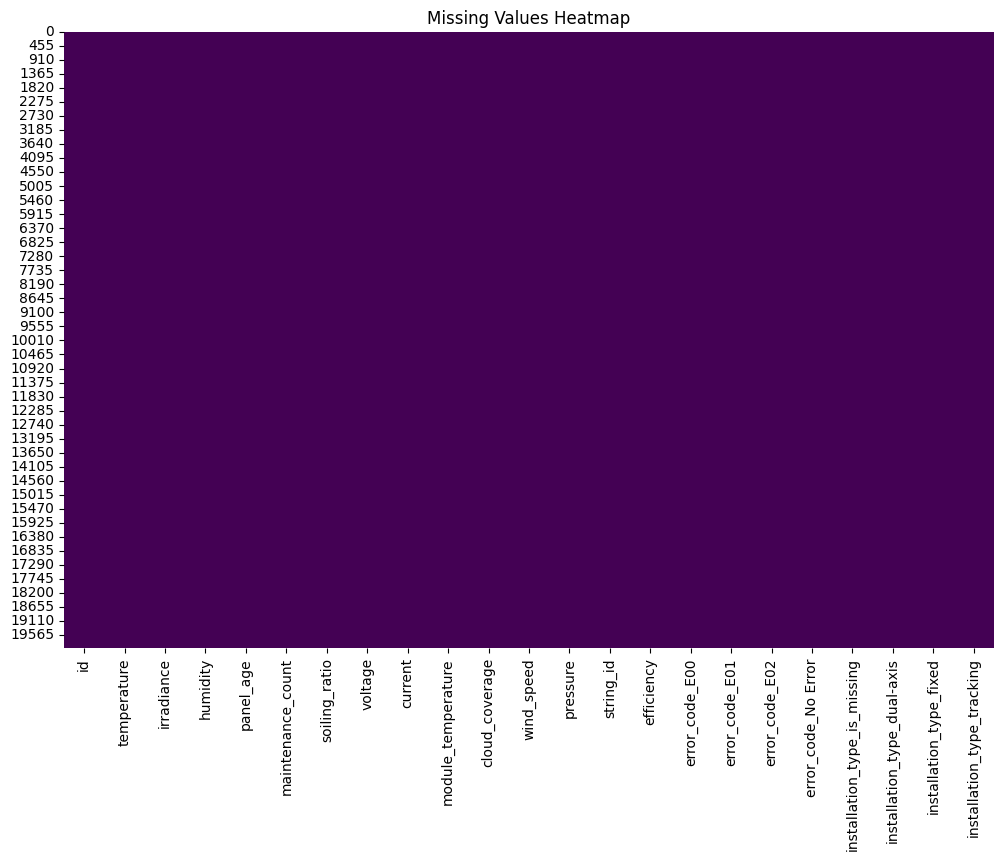

In [10]:
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

In [12]:
# Feature Selection

df['power'] = df['voltage'] * df['current']
df['area'] = df['power'] / df['efficiency']

df

,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,...,error_code_E00,error_code_E01,error_code_E02,error_code_No Error,installation_type_is_missing,installation_type_dual-axis,installation_type_fixed,installation_type_tracking,power,area
0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,...,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,73.452561,130.676128
1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,...,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0,5.274577,13.304608
2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,55.379098,...,1.0,0.0,0.0,0.0,1,0.0,0.0,0.0,202.140687,352.298934
3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,...,0.0,0.0,0.0,1.0,0,1.0,0.0,0.0,44.470168,70.698753
4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,...,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,16.868428,604.005659,93.53031757838667,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,...,0.0,0.0,1.0,0.0,0,0.0,0.0,1.0,36.508185,54.907238
19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,...,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.000000,0.000000
19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,...,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,53.176896,126.691799
19998,16.996227,632.760700,43.01470184078199,19.063517,4.0,0.688230,0.000000,1.068906,21.149351,78.123689,...,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.000000,0.000000


In [13]:
df.drop('id', axis = 1, inplace=True)
df.drop('string_id', axis = 1, inplace=True)
df.drop('voltage', axis = 1, inplace=True)
df.drop('current', axis = 1, inplace=True)

In [14]:
df

,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,module_temperature,cloud_coverage,wind_speed,pressure,...,error_code_E00,error_code_E01,error_code_E02,error_code_No Error,installation_type_is_missing,installation_type_dual-axis,installation_type_fixed,installation_type_tracking,power,area
0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,13.691147,62.494044,12.82491203459621,1018.8665053152533,...,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,73.452561,130.676128
1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,27.545096,43.851238,12.012043660984917,1025.6238537572883,...,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0,5.274577,13.304608
2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,43.363708,55.379098,1.814399755560454,1010.9226539809573,...,1.0,0.0,0.0,0.0,1,0.0,0.0,0.0,202.140687,352.298934
3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,57.720436,67.361473,8.736258932034128,1021.8466633134253,...,0.0,0.0,0.0,1.0,0,1.0,0.0,0.0,44.470168,70.698753
4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,6.786263,3.632000,0.52268384077164,1008.5559577591927,...,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,16.868428,604.005659,93.53031757838667,14.393967,3.0,0.738911,26.206810,1.733013,12.594122273332914,1018.3744670739436,...,0.0,0.0,1.0,0.0,0,0.0,0.0,1.0,36.508185,54.907238
19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,65.000000,64.558667,0.9769909288128159,1016.081102065643,...,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.000000,0.000000
19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,11.584869,57.730134,4.750937249871706,1009.6844614602336,...,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,53.176896,126.691799
19998,16.996227,632.760700,43.01470184078199,19.063517,4.0,0.688230,21.149351,78.123689,11.304158443374758,1006.6738746072241,...,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.000000,0.000000
